# Ligand ADMET and Potency (Property Prediction)

The [ADMET](https://polarishub.io/competitions/asap-discovery/antiviral-admet-2025) and [Potency](https://polarishub.io/competitions/asap-discovery/antiviral-potency-2025) Challenge of the [ASAP Discovery competition](https://polarishub.io/blog/antiviral-competition) take the shape of a property prediction task. Given the SMILES (or, to be more precise, the CXSMILES) of a molecule, you are asked to predict the numerical properties of said molecule. This is a relatively straight-forward application of ML and this notebook will quickly get you up and running!

To begin with, choose one of the two challenges! The code will look the same for both. 

In [1]:
CHALLENGE = "antiviral-admet-2025"

## Load the competition

Let's first load the competition from Polaris.

Make sure you are logged in! If not, simply run `polaris login` and follow the instructions. 

In [2]:
import polaris as po

competition = po.load_competition(f"asap-discovery/{CHALLENGE}")

[2025-03-07 17:46:21] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=338336;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\_artifact.py\_artifact.py]8;;\:]8;id=633244;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.7.dev6+g2737b66).                                                             

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=883515;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\dataset\_base.py\_base.py]8;;\:]8;id=680383;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\dataset\_base.py#182\182]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

As suggested in the logs, we'll cache the dataset. Note that this is not strictly necessary, but it does speed up later steps.

In [3]:
competition.cache()

Output()

[17:46:24] Copying to destination                                                                      ]8;id=490189;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\dataset\_base.py\_base.py]8;;\:]8;id=243117;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\dataset\_base.py#381\381]8;;\
           C:\Users\agitter\AppData\Local\polaris\polaris\Cache\datasets\3aa8e146-fcc5-4ae5-945d-6a119             
           6f32d7a\data.zarr                                                                                       

           For large Zarr archives, this may take a while.                                             ]8;id=984673;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\dataset\_base.py\_base.py]8;;\:]8;id=683636;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\dataset\_base.py#382\382]8;;\

[17:46:28]  Success: Copying Zarr keys                                                                ]8;id=7134;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\utils\context.py\context.py]8;;\:]8;id=301161;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\utils\context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=133317;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\utils\context.py\context.py]8;;\:]8;id=822273;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\utils\context.py#53\53]8;;\

'C:\\Users\\agitter\\AppData\\Local\\polaris\\polaris\\Cache\\datasets\\3aa8e146-fcc5-4ae5-945d-6a1196f32d7a'

Let's get the train and test set and take a look at the data structure.

In [4]:
train, test = competition.get_train_test_split()

In [5]:
train[0]

('COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a:16|',
 {'LogD': 0.3, 'HLM': nan, 'MDR1-MDCKII': 2.0, 'KSOL': nan, 'MLM': nan})

In [6]:
test[0]

'CC(C)[C@H]1C2=C(CCN1C(=O)CC1=CN=CC3=CC=CC=C13)SC=C2 |o1:3|'

In [7]:
len(train)

434

In [8]:
len(test)

126

In [9]:
import datamol as dm

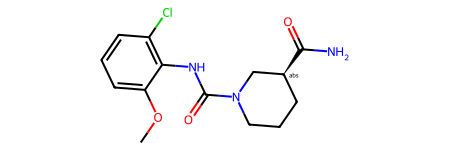

In [11]:
# From manuscript: "This new supervised tabular learning method can be applied to any small- to moderate-sized dataset and yields dominant performance for datasets with up to 10,000 samples and 500 features."
mol = dm.to_mol(train[0][0])
mol

In [12]:
fp = dm.to_fp(mol, fpSize=500)
fp

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Raw data dump
We've decided to sacrifice the completeness of the scientific data to improve its ease of use. For those that are interested, you can also access the raw data dump that this dataset has been created from.

In [9]:
import fsspec
import zipfile

with fsspec.open("https://fs.polarishub.io/2025-01-asap-discovery/raw_data_package.zip") as fd:
    with zipfile.ZipFile(fd, 'r') as zip_ref:
        zip_ref.extractall("./raw_data_package/")

ValueError: The HTTP server doesn't appear to support range requests. Only reading this file from the beginning is supported. Open with block_size=0 for a streaming file interface.

In [8]:
import pandas as pd
from pathlib import Path

subdir = "admet" if CHALLENGE == "antiviral-admet-2025" else "potency"

path = Path("./raw_data_package")
path = path / subdir

csv_files = list(path.glob("*.csv"))
pd.read_csv(csv_files[0]).head(3)

,in-vitro_MDR1-MDCKII-Papp_bienta: mean_Papp_A_to_B (Mod),in-vitro_MDR1-MDCKII-Papp_bienta: mean_Papp_A_to_B (Num) (10^-6 cm/s),in-vitro_MDR1-MDCKII-Papp_bienta: SD_Papp_A_to_B (Mod),in-vitro_MDR1-MDCKII-Papp_bienta: SD_Papp_A_to_B (Num),in-vitro_MDR1-MDCKII-Papp_bienta: mean_percent_recovery_A_to_B (Mod),in-vitro_MDR1-MDCKII-Papp_bienta: mean_percent_recovery_A_to_B (Num),in-vitro_MDR1-MDCKII-Papp_bienta: SD_percent_recovery_A_to_B (Mod),in-vitro_MDR1-MDCKII-Papp_bienta: SD_percent_recovery_A_to_B (Num),in-vitro_MDR1-MDCKII-Papp_bienta: mean_Papp_B_to_A (Mod),in-vitro_MDR1-MDCKII-Papp_bienta: mean_Papp_B_to_A (Num) (10^-6 cm/s),in-vitro_MDR1-MDCKII-Papp_bienta: SD_Papp_B_to_A (Mod),in-vitro_MDR1-MDCKII-Papp_bienta: SD_Papp_B_to_A (Num),in-vitro_MDR1-MDCKII-Papp_bienta: mean_percent_recovery_B_to_A (Mod),in-vitro_MDR1-MDCKII-Papp_bienta: mean_percent_recovery_B_to_A (Num),in-vitro_MDR1-MDCKII-Papp_bienta: SD_percent_recovery_B_to_A (Mod),in-vitro_MDR1-MDCKII-Papp_bienta: SD_percent_recovery_B_to_A (Num),Molecule Name,CXSMILES (CDD Compatible),Batch Created Date
0,=,9.46,=,0.359309,=,82.0,=,0.453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASAP-0023274,O=C(NC1=CC(Cl)=CC(C(=O)NC2=CC=CC(N3N=NNC3=O)=C...,2024-04-01
1,=,5.06,=,0.917089,=,85.5,=,2.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASAP-0023270,O=C(NC1=CC(Cl)=CC(C(=O)NC2=CC=CC(C3=NN=NN3)=C2...,2024-04-01
2,=,2.79,=,0.024695,=,76.0,=,1.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASAP-0023266,CC[C@H](CC1=NN=NN1)C1=CC=C(NC(=O)C2=CC(Cl)=CC(...,2024-04-01


## Build a model
Next, we'll train a simple baseline model using scikit-learn. 

You'll notice that the challenge has multiple targets.

In [13]:
train.target_cols

['LogD', 'HLM', 'MDR1-MDCKII', 'KSOL', 'MLM']

An interesting idea would be to build a multi-task model to leverage shared information across tasks.

For the sake of simplicity, however, we'll simply build a model per target here. 

In [14]:
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor

# Prepare the input data. We'll use Datamol to compute the ECFP fingerprints for both the train and test columns.
# Use fingerprint size of 500 instead of default 2048
X_train = np.array([dm.to_fp(dm.to_mol(smi), fpSize=500) for smi in train.X])
X_test = np.array([dm.to_fp(dm.to_mol(smi), fpSize=500) for smi in test.X])

y_pred = {}

# For each of the targets...
for tgt in competition.target_cols:

    # We get the training targets
    # Note that we need to mask out NaNs since the multi-task matrix is sparse.
    y_true = train.y[tgt]
    mask = ~np.isnan(y_true)

    # We'll train a simple baseline model
    model = GradientBoostingRegressor()
    model.fit(X_train[mask], y_true[mask])

    # And then use that to predict the targets for the test set
    y_pred[tgt] = model.predict(X_test)

In [15]:
y_pred

{'LogD': array([3.04924187, 2.58216539, 2.80788792, 2.85097993, 2.80849754,
        2.38223248, 1.65130333, 2.46302338, 2.66432778, 2.0388645 ,
        1.63880015, 2.25599504, 2.09728098, 2.62224334, 1.97035021,
        2.44563813, 2.85114312, 2.58798986, 1.85918249, 2.30133906,
        1.55007153, 2.32405084, 2.32475925, 3.23538253, 3.25370237,
        2.66839877, 2.67126783, 2.2458129 , 2.88568972, 3.33540682,
        2.68217138, 2.37484476, 2.49534638, 2.67126783, 2.17693136,
        2.80103488, 2.58216539, 2.6486792 , 1.75738161, 2.37840006,
        2.76455637, 2.20511721, 2.12064349, 2.90657125, 2.40192955,
        2.20511721, 2.85896164, 2.85896164, 2.68106579, 2.63210962,
        2.74272008, 2.57523295, 2.18309128, 2.31436226, 2.08247675,
        1.91195353, 2.88418338, 3.48314384, 1.81741039, 2.04368834,
        2.69241785, 1.82257301, 2.29258079, 2.16430124, 2.174384  ,
        1.9412667 , 1.68611307, 2.13447665, 2.25379167, 1.90527157,
        1.68629025, 2.24227724, 1.440923

## Submit your predictions
Submitting your predictions to the competition is simple.

In [13]:
competition.submit_predictions(
    predictions=y_pred,
    prediction_name="tutorial-predictions",
    prediction_owner="agitter",
    report_url="https://github.com/agitter/asap-polaris-admet-challenge", 
    github_url="https://github.com/agitter/asap-polaris-admet-challenge",
    description="Submission using the tutorial Jupyter notebook",
    tags=["tutorial"],
    user_attributes={"Framework": "Scikit-learn", "Method": "Gradient Boosting"}
)

[22:31:38]  Success: Submitting competition predictions                                               ]8;id=261273;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\utils\context.py\context.py]8;;\:]8;id=262223;file://C:\Users\agitter\.conda\envs\asap-admet\Lib\site-packages\polaris\utils\context.py#53\53]8;;\

For the ASAP competition, we will only evaluate your latest submission. 

The results will only be disclosed after the competition ends.

The End.